## Task 1

The `LinearRegression().fit()` method is a function in the scikit-learn library for Python that performs linear regression on a given dataset. Linear regression is a statistical method that models the relationship between a dependent variable and one or more independent variables by fitting a linear equation to the data.

The `.fit()` method is used to train the model on a given training dataset, i.e., it computes the coefficients of the linear equation that best fits the data. The input to the `.fit()` method is typically a set of input features and corresponding output values (or target variable). The method uses an optimization algorithm to find the parameters of the linear equation that minimize the sum of squared errors between the predicted output values and the actual output values in the training dataset.

Once the model is trained using the `.fit()` method, it can be used to make predictions on new, unseen data by calling the `.predict()` method. The model can also be evaluated using various metrics, such as mean squared error or R-squared, to measure the accuracy of the predictions.

## Task 2

Gradient descent is an iterative optimization algorithm used to minimize the cost function of a model. In the case of linear regression with one independent variable and one dependent variable, the goal of gradient descent is to find the values of the coefficients (slope and intercept) that minimize the difference between the predicted values and the actual values of the dependent variable.

Here's a step-by-step explanation of how gradient descent works:

1.   Initialize the coefficients: We start by initializing the values of the coefficients to some arbitrary values. These values can be zero, random, or any other value.
2.   Compute the cost function: We then compute the cost function, which is a measure of how well the current model fits the data. In the case of linear regression, the cost function is typically the mean squared error (MSE), which is the average of the squared differences between the predicted values and the actual values of the dependent variable.

$$MSE =  \frac{1}{N} \sum_{i=1}^{n} (y_i - (m x_i + b))^2$$

3.   Compute the gradients: We then compute the gradients of the cost function with respect to each of the coefficients. The gradients tell us the direction in which we need to update the coefficients to minimize the cost function.

$$\begin{split}\begin{align}
f'(m,b) =
  \begin{bmatrix}
    \frac{df}{dm}\\
    \frac{df}{db}\\
  \end{bmatrix}
&=
  \begin{bmatrix}
    \frac{1}{N} \sum -x_i \cdot 2(y_i - (mx_i + b)) \\
    \frac{1}{N} \sum -1 \cdot 2(y_i - (mx_i + b)) \\
  \end{bmatrix}\\
&=
  \begin{bmatrix}
     \frac{1}{N} \sum -2x_i(y_i - (mx_i + b)) \\
     \frac{1}{N} \sum -2(y_i - (mx_i + b)) \\
  \end{bmatrix}
\end{align}\end{split}$$

4.   Update the coefficients: We then update the values of the coefficients using the gradients and a learning rate. The learning rate is a hyperparameter that determines the size of the step we take in the direction of the gradients. We want to take a step small enough that we don't overshoot the minimum, but large enough that we converge to the minimum quickly.

5.   Repeat steps 2-4: We repeat steps 2-4 until the cost function converges to a minimum. Convergence is achieved when the change in the cost function between iterations falls below a certain threshold, or when a maximum number of iterations is reached.

6.   Return the coefficients: Once convergence is achieved, we return the values of the coefficients as the optimal values that minimize the cost function and represent the best fit of the linear regression model to the data.

In summary, gradient descent is an iterative algorithm that finds the values of the coefficients in a linear regression model that minimize the cost function by updating the coefficients in the direction of the gradients of the cost function with respect to each coefficient.

# Task 3, 4, 5


In [2]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [3]:
data = pd.read_pickle('/content/drive/MyDrive/Assignment2/train_dataset.pickle')

In [4]:
np.random.shuffle(data)
dataSplit = np.split(data, 20)
np.shape(dataSplit)

(20, 40, 2)

In [5]:
test_data = pd.read_pickle('/content/drive/MyDrive/Assignment2/test_dataset.pickle')
np.shape(test_data)
x_test = test_data[:, 0].reshape(-1, 1)
y_test = test_data[:, 1]

(200,)

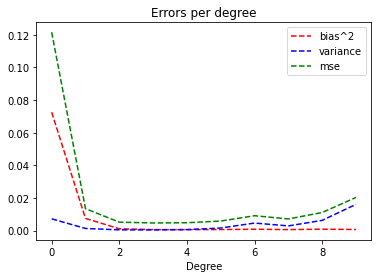

In [25]:
model = LinearRegression()
bias, variance, irreducible_error, mse = [], [], [], []
for deg in range(1, 16):
  poly = PolynomialFeatures(deg)
  predicted = []
  for dataset in dataSplit:
    x_train = dataset[:, 0].reshape(-1, 1)
    y_train = dataset[:, 1]
    x_train_transformed = poly.fit_transform(x_train)
    x_test_transformed = poly.fit_transform(x_test)
    model.fit(x_train_transformed, y_train)
    # The predicted array below contains the 200 predicted values of y for each
    # of the 20 model that we've trained
    predicted.append(model.predict(x_test_transformed))
  
  # The mean array will contain the mean of the predicted y's across the twenty models
  mean = []
  for i in range(200):
    avg = 0
    for j in range(20):
      avg += predicted[j][i]
    avg = avg/20
    mean.append(avg)
  # bias will be the absolute value between the difference of predicted value of
  # y and actual value of y
  # bias_degree will contain the mean of the biases ACROSS ELEMENTS
  bias_element = np.absolute(mean-y_test)
  bias_degree = np.mean(bias_element)
  #bias_degree += np.mean(bias_element)
  # Now, we append this bias_degree to the bias array
  bias.append(bias_degree)
  # Now that we are done with calculating the bias of a specific degree, we will
  # now go on to calculate variance of this degree
  # To calculate the variance, we will calculate the delta. Delta is the
  # difference of between the mean of the predicted values, and the predicted 
  # values, and the square it
  delta_element = []
  for i in range(200):
    delta = 0
    for j in range(20):
      delta += np.square((mean[i]-predicted[j][i]))
    delta = delta/20
    delta_element.append(delta)
  variance_degree = np.mean(delta_element)
  variance.append(variance_degree)
  # Now, we will calculate the MSE of a specific degree, which will just be the
  # mean of [ square of all the errors of elements ] ACROSS the elements
  mse_element = []
  for i in range(200):
    MSE = 0
    for j in range(20):
      MSE += np.square((y_test[i]-predicted[j][i]))
    MSE = MSE/20
    mse_element.append(MSE)
  mse_degree = np.mean(mse_element)
  mse.append(mse_degree)

  # Now we calculate irreducible error, which is defined as the difference
  # between [ MSE ] and [bias^2+variance] i.e. irreducible_error = MSE - (bias^2+variance)
  irreducible_error_element = mse_element - (np.square(bias_element)+delta_element)
  irreducible_error_degree = np.mean(irreducible_error_element)
  irreducible_error.append(irreducible_error_degree)

plt.plot(np.square(bias)[:10],'r--',label="bias^2")
plt.xlabel("Degree")
plt.title("Errors per degree")
plt.plot(variance[:10],'b--',label="variance")
plt.plot(mse[:10],'g--',label="mse")
plt.legend()
plt.show()


In [23]:
deg = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
data = {'degree':deg,'irreducible_error':irreducible_error}

information = pd.DataFrame(data)
# information = information.reset_index(drop=True)
information

,degree,irreducible_error
0,1,-4.194128e-17
1,2,-3.728029e-18
2,3,-1.887867e-18
3,4,2.969359e-18
4,5,1.462318e-18
5,6,9.550330e-18
6,7,3.554828e-18
7,8,-2.614282e-18
8,9,-1.351756e-17
9,10,1.048966e-18
